# Author: Ankit Kumar

# The Sparks Foundation

# Stock Market Prediction using Numerical and Textual Analysis

# Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import nltk  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
import re

# Reading Data File

In [ ]:
#### Samsung Stock Dataset #####
df_stock = pd.read_csv("C:\\Users\\ankit\\Downloads\\005930.KS.csv")
df_stock.head()

In [ ]:
#### News Headline Dataset #####
df_headline = pd.read_csv("C:\\Users\\ankit\\Downloads\\india-news-headlines.csv")
df_headline.head()

In [4]:
df_stock.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [5]:
#### Handling Missing Values ####
for i in ["Open","High","Low","Close","Adj Close","Volume"]:
    df_stock[i].fillna(df_stock[i].mean(),inplace=True)

In [6]:
df_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df_headline.drop(columns=["headline_category"],inplace=True)

# Setting date as a index

In [ ]:
##### Stock price Data ######
df_stock['Date']=pd.to_datetime(df_stock['Date']) 

##### News Headlines Data #####
df_headline['publish_date'] = df_headline['publish_date'].astype(str)
df_headline = df_headline.filter(['publish_date', 'headline_text'])   # filtering the important columns required
df_headline = df_headline.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()  # grouping the news headlines according to 'Date'
df_headline['publish_date']=pd.to_datetime(df_headline['publish_date'])

In [9]:
df_stock.set_index('Date',inplace=True)
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0


In [10]:
df_headline.set_index('publish_date',inplace=True)
df_headline.head()

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...


# Combining Samsung Stock Dataset and News Headline Dataset

In [11]:
stock_market=pd.concat([df_stock,df_headline],axis=1)
stock_market.dropna(axis=0,inplace=True)
stock_market.head()

,Open,High,Low,Close,Adj Close,Volume,headline_text
2001-01-02,3160.0,3380.0,3140.0,3350.0,2587.465332,39455000.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,3230.0,3420.0,3220.0,3370.0,2602.911865,37855000.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,3790.0,3870.0,3660.0,3780.0,2919.587402,119910000.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,3760.0,3920.0,3700.0,3900.0,3012.272705,78135000.0,Light combat craft takes India into club class...
2001-01-08,3820.0,3910.0,3780.0,3880.0,2996.824707,42295000.0,"Sangh Parivar; Babri panel up the ante,Frontru..."


# Cleaning the textual data by using Natural Language Preprocessing (NLP)

In [12]:
lent=len(stock_market) 
corpus111=[]
for i in range(0,lent):
    text = re.sub('[^a-zA-Z]', ' ', stock_market.iloc[i,6])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')     
    text = [ps.stem(word) for word in text if not word in   set(all_stopwords)]
    text = ' '.join(text)
    corpus111.append(text)  
    
stock_market['headline_text']=corpus111    

# Calculating Sentiment Score 

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_market['Compound'] = stock_market['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_market['Negative'] = stock_market['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_market['Neutral'] = stock_market['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_market['Positive'] = stock_market['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])



In [14]:
stock_market.head()

,Open,High,Low,Close,Adj Close,Volume,headline_text,Compound,Negative,Neutral,Positive
2001-01-02,3160.0,3380.0,3140.0,3350.0,2587.465332,39455000.0,statu quo disturb ayodhya say vajpaye fissur h...,-0.8555,0.125,0.773,0.102
2001-01-03,3230.0,3420.0,3220.0,3370.0,2602.911865,37855000.0,powerless north india grope dark think laxman ...,-0.5994,0.132,0.755,0.113
2001-01-04,3790.0,3870.0,3660.0,3780.0,2919.587402,119910000.0,string pull stephen hawk india vajpaye give bi...,0.9169,0.099,0.791,0.110
2001-01-05,3760.0,3920.0,3700.0,3900.0,3012.272705,78135000.0,light combat craft take india club class hawk ...,-0.3612,0.171,0.659,0.170
2001-01-08,3820.0,3910.0,3780.0,3880.0,2996.824707,42295000.0,sangh parivar babri panel ant frontrunn key us...,-0.6808,0.100,0.816,0.084


In [15]:
stock_market["Close"]

2001-01-02     3350.0
2001-01-03     3370.0
2001-01-04     3780.0
2001-01-05     3900.0
2001-01-08     3880.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 4990, dtype: float64

In [16]:
stock_market.shape

(4990, 11)

# Finalizing Stock Data and Save as a csv file

In [17]:
stock_market.drop(columns=["headline_text"],inplace=True)
index = stock_market.index
index.name = "Date"

In [18]:
stock_market.to_csv('stock_market.csv')

# Reading Stock Data File

In [48]:
df=pd.read_csv("stock_market.csv")

In [49]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,
2001-01-02,3160.0,3380.0,3140.0,3350.0,2587.465332,39455000.0,-0.8555,0.125,0.773,0.102
2001-01-03,3230.0,3420.0,3220.0,3370.0,2602.911865,37855000.0,-0.5994,0.132,0.755,0.113
2001-01-04,3790.0,3870.0,3660.0,3780.0,2919.587402,119910000.0,0.9169,0.099,0.791,0.110
2001-01-05,3760.0,3920.0,3700.0,3900.0,3012.272705,78135000.0,-0.3612,0.171,0.659,0.170
2001-01-08,3820.0,3910.0,3780.0,3880.0,2996.824707,42295000.0,-0.6808,0.100,0.816,0.084


# Exploratory Data Analysis of Stock data

In [5]:
df.shape

(4990, 10)

In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Compound     0
Negative     0
Neutral      0
Positive     0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Compound,Negative,Neutral,Positive
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4.990000e+03,4990.000000,4990.000000,4990.000000,4990.000000
mean,22435.000946,22671.228868,22196.495765,22437.131233,19308.388593,2.050876e+07,-0.908771,0.144003,0.762105,0.093894
std,15420.478318,15571.187576,15271.316160,15423.381916,14697.188726,1.290761e+07,0.372691,0.022265,0.028651,0.023551
min,2760.000000,2810.000000,2680.000000,2810.000000,2170.380615,0.000000e+00,-1.000000,0.000000,0.244000,0.000000
25%,10745.000000,10920.000000,10600.000000,10760.000000,8403.466797,1.160262e+07,-0.999800,0.132000,0.749000,0.082000
50%,16410.000000,16560.000000,16240.000000,16400.000000,13302.697266,1.739900e+07,-0.999400,0.143000,0.765000,0.092000
75%,29200.000000,29460.000000,28815.000000,29115.000000,24309.433594,2.598202e+07,-0.997000,0.156000,0.778000,0.103000
max,79000.000000,81300.000000,78200.000000,81000.000000,80286.203125,1.313050e+08,0.999900,0.327000,1.000000,0.756000


# Visualizing Close Price

Text(0, 0.5, 'Close Price')

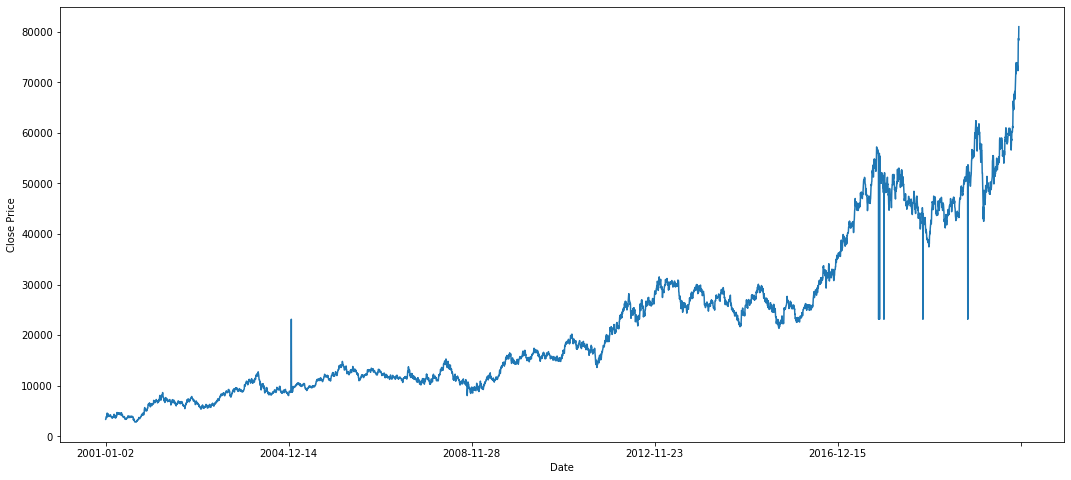

In [8]:
plt.figure(figsize=(18,8))
df["Close"].plot()
plt.xlabel('Date')
plt.ylabel('Close Price')

In [9]:
# calculating 7 day rolling mean
df.rolling(7).mean().head(15)

,Open,High,Low,Close,Adj Close,Volume,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,3624.285714,3738.571429,3558.571429,3690.000000,2850.073138,5.788071e+07,-0.367543,0.109714,0.801000,0.089429
2001-01-23,3822.857143,3905.714286,3760.000000,3861.428571,2982.480678,5.224429e+07,-0.107014,0.097429,0.810429,0.092286
2001-01-24,4011.428571,4067.142857,3950.000000,4030.000000,3112.681571,4.683643e+07,0.038829,0.090143,0.820286,0.089714


<AxesSubplot:xlabel='Date', ylabel='Price'>

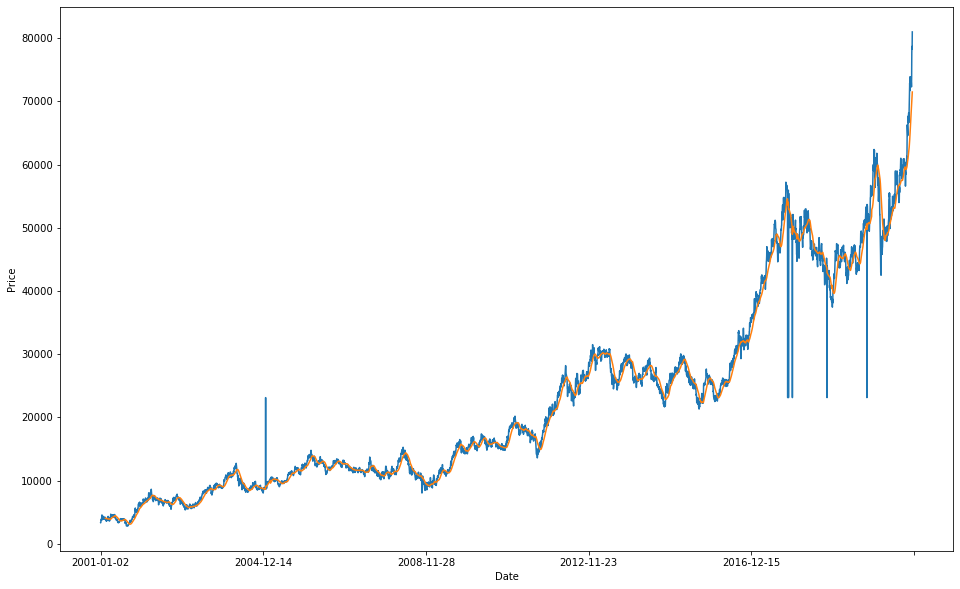

In [10]:
# plotting the close price and a 30-day rolling mean of close price
plt.figure(figsize=(16,10))
df['Close'].plot()
plt.ylabel("Price")
df.rolling(window=30).mean()['Close'].plot()

# Testing For Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adfuller_test(Price):
    result=adfuller(Price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:                # If p_value is less than 0.05 than data is Stationary otherwise data is Non-Stationary
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

In [13]:
#### Testing Adfuller_test
adfuller_test(df['Close'])

ADF Test Statistic : 1.8122636122701679
p-value : 0.9983730323454776
#Lags Used : 30
Number of Observations Used : 4959
Data is non-stationary 


# Converting Non-Stationary to Stationary data

In [14]:
## For converting non stationary to stationary data
df['Seasonal Close Price Difference']=df['Close']-df['Close'].shift(12)

In [15]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,Compound,Negative,Neutral,Positive,Seasonal Close Price Difference
Date,,,,,,,,,,,
2001-01-02,3160.0,3380.0,3140.0,3350.0,2587.465332,39455000.0,-0.8555,0.125,0.773,0.102,NaN
2001-01-03,3230.0,3420.0,3220.0,3370.0,2602.911865,37855000.0,-0.5994,0.132,0.755,0.113,NaN
2001-01-04,3790.0,3870.0,3660.0,3780.0,2919.587402,119910000.0,0.9169,0.099,0.791,0.110,NaN
2001-01-05,3760.0,3920.0,3700.0,3900.0,3012.272705,78135000.0,-0.3612,0.171,0.659,0.170,NaN
2001-01-08,3820.0,3910.0,3780.0,3880.0,2996.824707,42295000.0,-0.6808,0.100,0.816,0.084,NaN
2001-01-09,3830.0,3860.0,3710.0,3840.0,2965.929932,46280000.0,-0.9928,0.141,0.813,0.047,NaN
2001-01-10,3780.0,3810.0,3700.0,3710.0,2865.520020,41235000.0,0.0000,0.000,1.000,0.000,NaN
2001-01-23,4550.0,4550.0,4550.0,4550.0,3514.318115,0.0,0.9682,0.039,0.839,0.122,NaN
2001-01-24,4550.0,4550.0,4550.0,4550.0,3514.318115,0.0,0.4215,0.081,0.824,0.095,NaN


In [52]:
df.rename(columns={"Close":"Close Price"}, inplace=True)

In [17]:
### Again testing for  Stationarity
adfuller_test(df['Seasonal Close Price Difference'].dropna())

ADF Test Statistic : -10.173251467469766
p-value : 6.999404608452032e-18
#Lags Used : 30
Number of Observations Used : 4947
Data is stationary


Text(0, 0.5, 'Seasonal Close Price Difference')

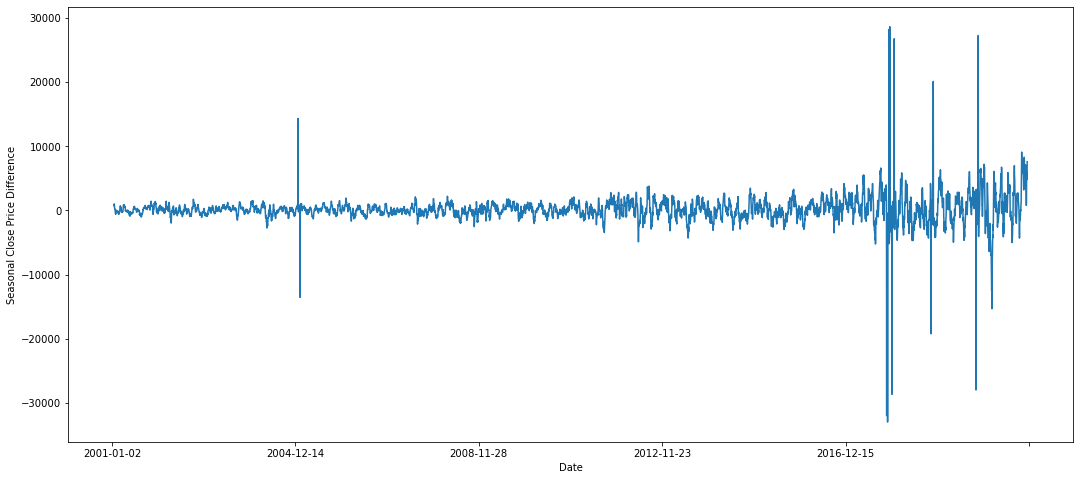

In [18]:
#### Visualize the Data ####
plt.figure(figsize=(18,8))
df["Seasonal Close Price Difference"].plot()
plt.xlabel('Date')
plt.ylabel('Seasonal Close Price Difference')

# Auto Regressive Model

In [19]:
### acf = Autocorellation Function
### pacf = Partial Autocorellation Function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

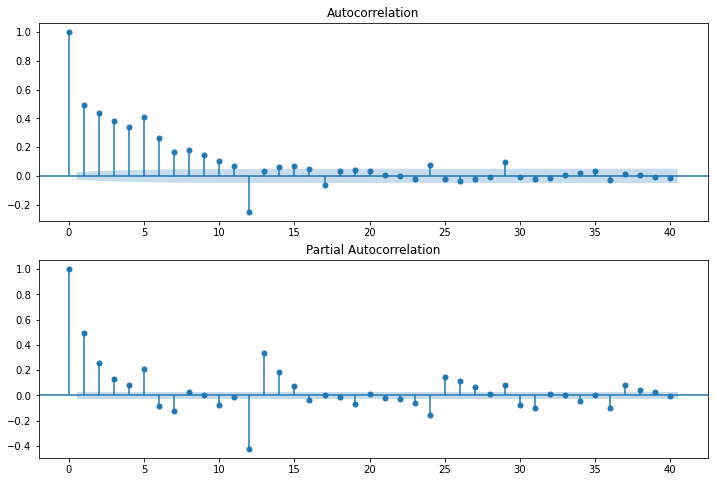

In [20]:
## Plotting Autocorellation and Partial Autocorellation Graph
## Collecting p,q,d values from observing these graph
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Close Price Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Close Price Difference'].dropna(),lags=40,ax=ax2)

# Predicting Using SARIMAX

In [50]:
import statsmodels.api as sm

In [53]:
model=sm.tsa.statespace.SARIMAX(df['Close Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))  # order=(p,d,q)
results=model.fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Close Price   No. Observations:                 4990
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -42341.386
Date:                            Tue, 10 Aug 2021   AIC                          84692.773
Time:                                    19:42:10   BIC                          84725.335
Sample:                                         0   HQIC                         84704.188
                                           - 4990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0017      0.005     -0.350      0.727      -0.011       0.008
ma.L1         -0.6431      0.005   -126.217      0.000      -0.653      -0.633
ar.S.L12      -0.0121      0.018     -0.685      0.493      -0.047       0.023
ma.S.L12      -1.0000      0.002   -575.601      0.000      -1.003      -0.997
sigma2      1.416e+06   1.23e-09   1.15e+15      0.000    1.42e+06    1.42e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          26742909.16
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              18.59   Skew:                           -12.63
Prob(H) (two-sided):                  0.00   Kurtosis:                       361.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.64e+30. Standard errors may be unstable.
"""

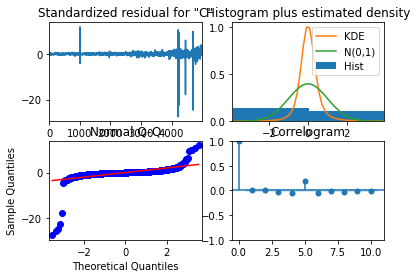

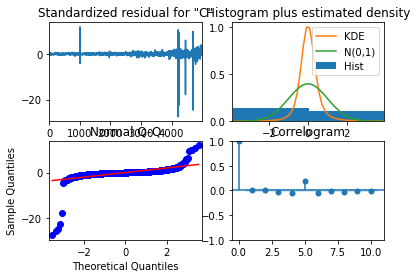

In [13]:
results.plot_diagnostics()

In [43]:
## Predicting the forecasted value
df['Forecasted Close Price']=results.predict(start=1,end=4989,dynamic=False)

In [45]:
#### Comparison b/w Actual Close Price and Predicted price
predict=pd.DataFrame({"Close Price": df['Close Price'],"Prediction":df['Forecasted Close Price']})
predict.dropna(axis=0, inplace=True)
predict.head()

,Close Price,Prediction
Date,,
2001-01-03,3370.0,2326.711377
2001-01-04,3780.0,2942.282441
2001-01-05,3900.0,3420.217228
2001-01-08,3880.0,3692.476159
2001-01-09,3840.0,3798.881490


# Accuracy Percentage

In [110]:
accuracy = (predict["Prediction"].sum() / predict["Close Price"].sum()) * 100
print(accuracy.round(1),"%")

99.9 %


# Comparison Graph Between Close price and Forecasted Close Price

Text(0.5, 1.0, 'Comparison Graph')

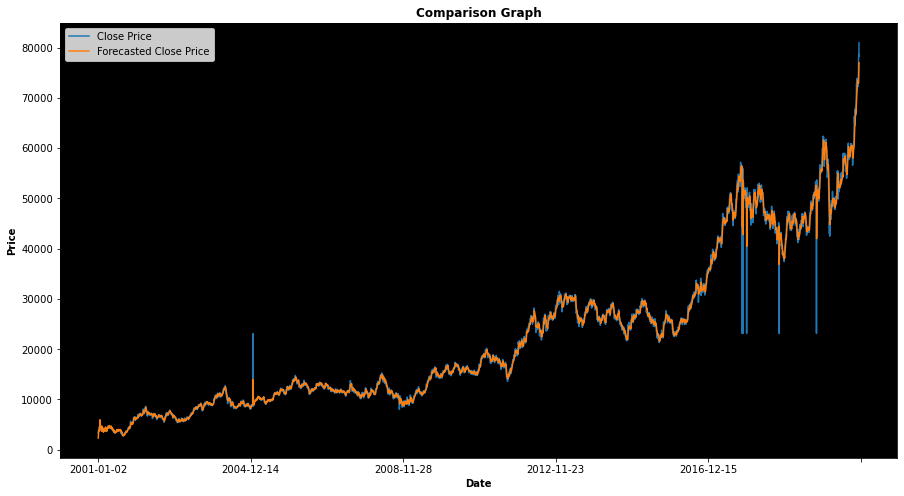

In [46]:
df[['Close Price','Forecasted Close Price']].plot(figsize=(15,8))
ax=plt.axes()
ax.set_facecolor("black")
plt.xlabel('Date', fontweight="bold")
plt.ylabel('Price',fontweight="bold")
plt.title('Comparison Graph',fontweight="bold")


# Predicting Close Price By using train_test_split method

In [54]:
from pmdarima.model_selection import train_test_split


(1497, 1)

# Split Data in test and train

In [ ]:
train, test = train_test_split(df[["Close Price"]], test_size =0.3)
test.shape

#  Predicting using SARIMAX

In [55]:
prediction = pd.DataFrame(results.predict(n_periods = 1497), test.index)
prediction.columns = ["predicted_sales"]
test["predicted_sales"] = prediction

In [56]:
test

,Close Price,predicted_sales
Date,,
2014-11-27,25280.0,24109.924789
2014-11-28,25740.0,24532.780271
2014-12-01,25900.0,24979.813602
2014-12-02,25900.0,25288.892300
2014-12-03,25960.0,25525.598537
...,...,...
2020-12-23,73900.0,72900.693081
2020-12-24,77800.0,73233.378827
2020-12-28,78700.0,74906.924081


# Visualizing Predicted Data

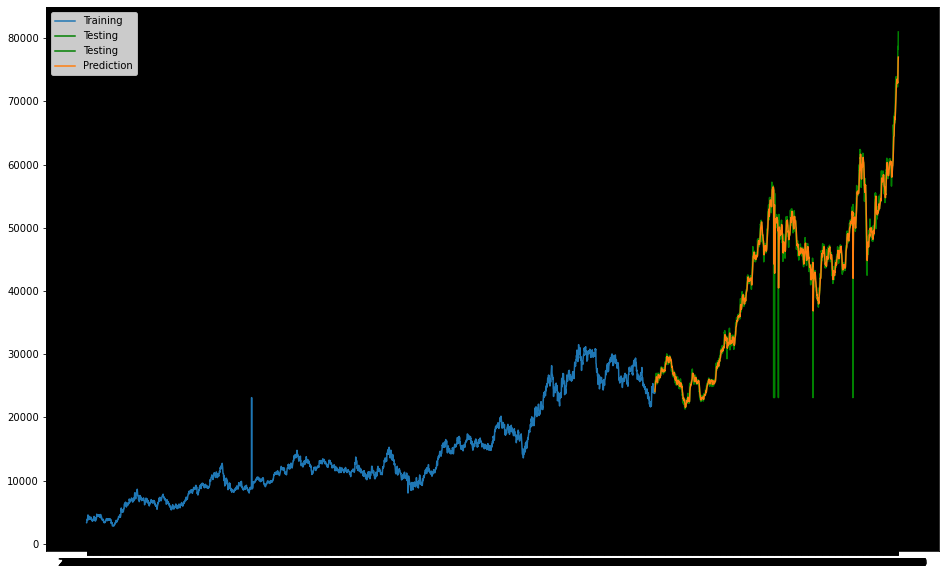

In [63]:
plt.figure(figsize = (16,10))
ax=plt.axes()
ax.set_facecolor("black")
plt.plot(train, label = "Training")
plt.plot(test, label = "Testing",color="green")
plt.plot(prediction, label = "Prediction")
plt.legend()